<a href="https://colab.research.google.com/github/ramendrasingla/data_analysis_tutorial/blob/main/Feature_Engineering_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.display import Image

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Part - 1

## Feature Engineering

* Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

* Act of converting raw observations into desired features using statistical or machine learning approaches

* Produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy

### Checking Data Quality using Feature Engineering

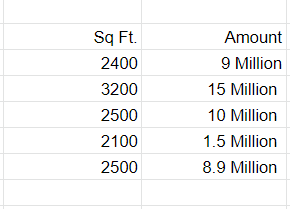

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_1.png')

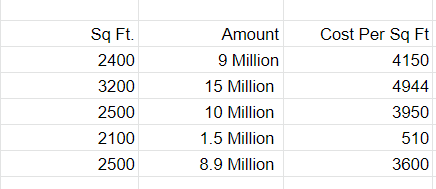

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_2.png')

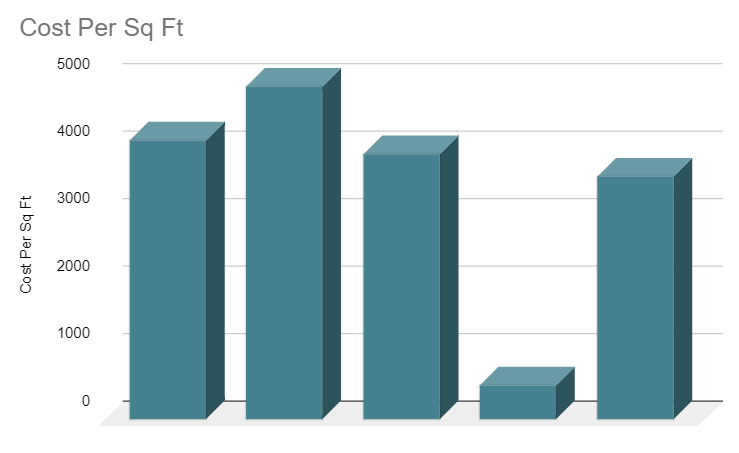

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_3.png')

### Processes in Feature Engineering

* **Feature Creation:** Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.
* **Transformations/ Feature Deletion:** Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.
* **Feature Extraction:** Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.
* **Exploratory Data Analysis:** Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It's often used on large amounts of qualitative or quantitative data that haven't been analyzed before.
* **Benchmark:** A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It's a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines, linear and non-linear classifiers, or different approaches like bagging and boosting. To learn more about feature engineering steps and process, check the links provided at the end of this article. Now, let's have a look at why we need feature engineering in machine learning.

## Feature Engineering Techniques for ML

### Imputation:
> 1. Numerical Imputation
```
data = data.fillna(0)
```
> 2. Categorical Imputation
```
data[‘column_name’].fillna(data[‘column_name’].value_counts().idxmax(), inplace=True)
```
### Handling Outliers:
> 1. **Removal:** Outlier-containing entries are deleted from the distribution. However, if there are outliers across numerous variables, this strategy may result in a big chunk of the datasheet being missed.
> 2. **Replacing values:** Alternatively, the outliers could be handled as missing values and replaced with suitable imputation.
> 3. **Capping:** Using an arbitrary value or a value from a variable distribution to replace the maximum and minimum values.
> 4. **Discretization:** Discretization is the process of converting continuous variables, models, and functions into discrete ones. This is accomplished by constructing a series of continuous intervals (or bins) that span the range of our desired variable/model/function.
### One-hot encoding:
> A one-hot encoding is a type of encoding in which an element of a finite set is represented by the index in that set, where only one element has its index set to “1” and all other elements are assigned indices within the range (0, n-1). In contrast to binary encoding schemes, where each bit can represent 2 values (i.e. 0 and 1), this scheme assigns a unique value for each possible case.
### Log Transform:
> Log Transform is the most used technique among data scientists. It's mostly used to turn a skewed distribution into a normal or less-skewed distribution.
```
df['log_column'] = np.log(df[‘column’])
```
### Scaling:
> Distance-based algorithms like k-NN and k-Means, on the other hand, require scaled continuous features as model input. There are two common ways for scaling :
> 1. **Normalization**: All values are scaled in a specified range between 0 and 1 via normalisation (or min-max normalisation). This modification has no influence on the feature's distribution, however it does exacerbate the effects of outliers due to lower standard deviations. As a result, it is advised that outliers be dealt with prior to normalisation.

> 2. **Standardization**: Standardization (also known as z-score normalisation) is the process of scaling values while accounting for standard deviation. If the standard deviation of features differs, the range of those features will likewise differ. The effect of outliers in the characteristics is reduced as a result. To arrive at a distribution with a 0 mean and 1 variance, all the data points are subtracted by their mean and the result divided by the distribution's variance.

## Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)

# Part - 2

## Preprocessing using sklearn

* Sklearn its preprocessing library forms a solid foundation to guide you through this important task in the data science pipeline.

### Missing Values


In [ ]:
df = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
df.columns = ['f1', 'f2', 'f3']
print(df)

      f1   f2    f3
0    5.0  7.0   8.0
1    NaN  NaN   NaN
2   -5.0  0.0  25.0
3  999.0  1.0  -1.0
4    NaN  0.0   NaN


In [ ]:
# Drop NaN rows
df_drop = df.dropna(axis=0, thresh=1)
df_drop.reset_index(inplace=True)
df_drop.drop(['index'], axis=1, inplace=True)
print(df_drop)

In [ ]:
# Imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df = df.replace({999.0: np.nan})
df_impute = imp.fit_transform(df)
# df_impute = df.fillna(df.mean(), inplace=True)
print(df_impute)

[[ 5.          7.          8.        ]
 [ 0.          2.         10.66666667]
 [-5.          0.         25.        ]
 [ 0.          1.         -1.        ]
 [ 0.          0.         10.66666667]]


### Polynomial Features

* Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target.They are mostly used to add complexity to linear models with little features, or when we suspect the effect of one feature is dependent on another feature.

* If degree = 2, X = [x1, x2] => polynomaialss_X = [x1^2, x2^2, x1x2] => the only non-linear polynomial would be **x1x2**

In [ ]:
# Note: Impute First(no null values)
# degree 3: f1, f2, f3 -> f1*f2, f1*f3, f2*f3, f1*f2*f3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=True)
df_polynomials = pd.DataFrame(poly\
                           .fit_transform(df_impute), 
                           columns=['0','1','2','3', 
                                    'p1', 'p2', 'p3', 'p4'])
print(df_polynomials)

     0    1    2          3    p1     p2         p3     p4
0  1.0  5.0  7.0   8.000000  35.0   40.0  56.000000  280.0
1  1.0  0.0  2.0  10.666667   0.0    0.0  21.333333    0.0
2  1.0 -5.0  0.0  25.000000  -0.0 -125.0   0.000000   -0.0
3  1.0  0.0  1.0  -1.000000   0.0   -0.0  -1.000000   -0.0
4  1.0  0.0  0.0  10.666667   0.0    0.0   0.000000    0.0


### Categorical Features

In [ ]:
X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low',
              'F', 'B+', np.NaN])
              .reshape((5,3)))
X.columns = ['sex', 'blood_type', 'edu_level']
print(X.head())

  sex blood_type edu_level
0   M         O-    medium
1   M         O-      high
2   F         O+      high
3   F         AB       low
4   F         B+       nan


In [ ]:
X.edu_level.values.reshape(-1, 1)

array([['medium'],
       ['high'],
       ['high'],
       ['low'],
       ['nan']], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X.edu_level = encoder.fit_transform(X.edu_level.values.reshape(-1, 1))
print(X)

  sex blood_type  edu_level
0   M         O-        2.0
1   M         O-        0.0
2   F         O+        0.0
3   F         AB        1.0
4   F         B+        3.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(X[['sex', 'blood_type']])\
    .toarray(),
    columns=['F', 'M', 'AB', 'B+','O+', 'O-'])
nominals['edu_level'] = X.edu_level
print(nominals)

   F  M  AB  B+  O+  O-  edu_level
0  0  1   0   0   0   1        2.0
1  0  1   0   0   0   1        0.0
2  1  0   0   0   1   0        0.0
3  1  0   1   0   0   0        1.0
4  1  0   0   1   0   0        3.0


<ipython-input-21-64be83e6f97a>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot = OneHotEncoder(dtype=np.int, sparse=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Numerical Features

#### Discretization

* Discretization, also known as quantization or binning, divides a continuous feature into a pre-specified number of categories (bins), and thus makes the data discrete.

* The optional strategy parameter can be set to three values using KBinsDiscretizer:

> 1. uniform, where all bins in each feature have identical widths.
> 2. quantile (default), where all bins in each feature have the same number of points.
> 3. kmeans, where all values in each bin have the same nearest center of a 1D k-means cluster.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
X = pd.DataFrame([[-2, 1, -4,   -1],
      [-1, 2, -3, -0.5],
      [ 0, 3, -2,  0.5],
      [ 1, 4, -1,    2]])
X.columns = ['f1', 'f2', 'f3', 'f4']
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)
Xt = est.transform(X)
print(Xt)

[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [2. 2. 2. 1.]
 [2. 2. 2. 2.]]


#### Binarization

* Feature binarization is the process of tresholding numerical features to get boolean values. Or in other words, assign a boolean value (True or False) to each sample based on a threshold. Note that binarization is an extreme form of two-bin discretization.

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0, copy=True)
X_binary = binarizer.fit_transform(X)
print(X_binary)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]]


### Scaling

#### Standardization

* Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.

##### Standard Scaler

```
x_scaled = (x - u)/s
```



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.34164079, -1.34164079, -1.34164079, -1.09108945],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.65465367],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ,  0.21821789],
       [ 1.34164079,  1.34164079,  1.34164079,  1.52752523]])

##### Min-Max Scaler

```
x_scaled = (x - min(x))/(max(x) - min(x))
```



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(X)

array([[-3., -3., -3., -3.],
       [-1., -1., -1., -2.],
       [ 1.,  1.,  1.,  0.],
       [ 3.,  3.,  3.,  3.]])

##### MaxAbs Scaler

```
x_scaled = x/max(abs(x))
```



In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit_transform(X)

array([[-1.  ,  0.25, -1.  , -0.5 ],
       [-0.5 ,  0.5 , -0.75, -0.25],
       [ 0.  ,  0.75, -0.5 ,  0.25],
       [ 0.5 ,  1.  , -0.25,  1.  ]])

##### Robust Scaler
* If your data contains many outliers, scaling using the mean and standard deviation of the data is likely to not work very well. In these cases, you can use the RobustScaler. It removes the median and scales the data according to the quantile range

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
robust.fit_transform(X)

array([[-62.5       , -62.5       , -62.5       , -83.33333333],
       [-20.83333333, -20.83333333, -20.83333333, -41.66666667],
       [ 20.83333333,  20.83333333,  20.83333333,  41.66666667],
       [ 62.5       ,  62.5       ,  62.5       , 166.66666667]])

# Part - 3

## Feature Creation

* Feature creation is finding the most useful variables to be used in a predictive model. The process is subjective, and it requires human creativity and intervention. The new features are created by mixing existing features using addition, subtraction, and ration, and these new features have great flexibility.

### Feature Creation using Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)
* Features to discuss - Merchandize, Country, URL

# Part - 4

## Feature Extraction

* Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). These new reduced set of features should then be able to summarize most of the information contained in the original set of features.

* Another commonly used technique to reduce the number of feature in a dataset is Feature Selection. The difference between Feature Selection and Feature Extraction is that feature selection aims instead to rank the importance of the existing features in the dataset and discard less important ones (no new features are created).

* Common Feature Extraction Methods - Principal Component Analysis(PCA), Linear Discriminant Analysis(LDA) ---> to be discussed in future sessions 

[Reference Link](https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be)


### Advantages of Feature Extraction:

* Accuracy improvements.
* Overfitting risk reduction.
* Speed up in training.
* Improved Data Visualization.
* Increase in explainability of our model.

### Curse of Dimensionality

* Hughes (1968) in his study concluded that with a fixed number of training samples, the predictive power of any classifier first increases as the number of dimensions increase, but after a certain value of number of dimensions, the performance deteriorates. Thus, the phenomenon of curse of dimensionality is also known as Hughes phenomenon.

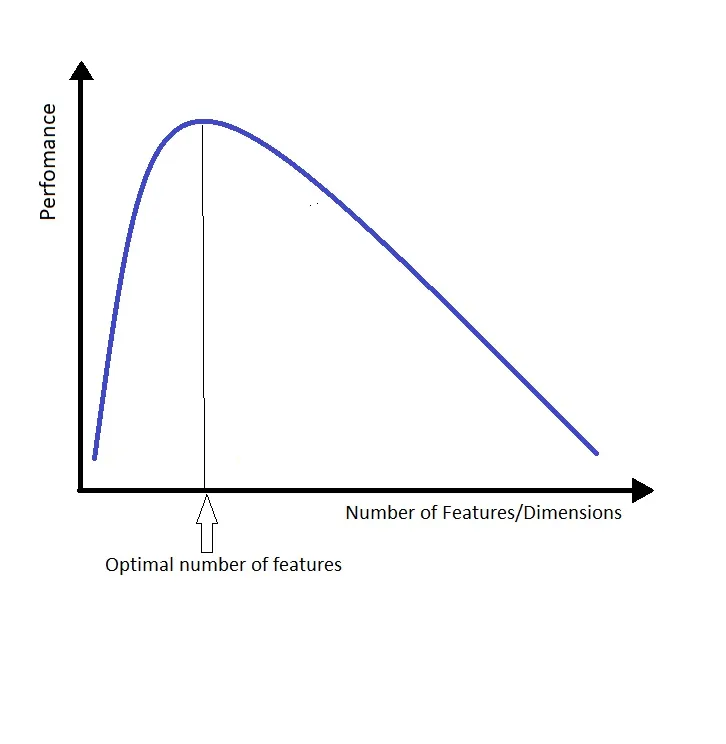

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/hughes_cod.png', height = 700)

#### Effect of Curse of Dimensionality on distance

* For any point A, lets assume the minimum distance between A and its nearest neighbor and the maximum distance between A and the farthest neighbor.

* That is, for a d — dimensional space, given n-random points, the min distance(A) ~ max distance(A) meaning, any given pair of points are equidistant to each other.

* Therefore, any machine learning algorithms which are based on the distance measure including KNN(k-Nearest Neighbor) tend to fail when the number of dimensions in the data is very high. Thus, dimensionality can be considered as a “curse” in such algorithms.

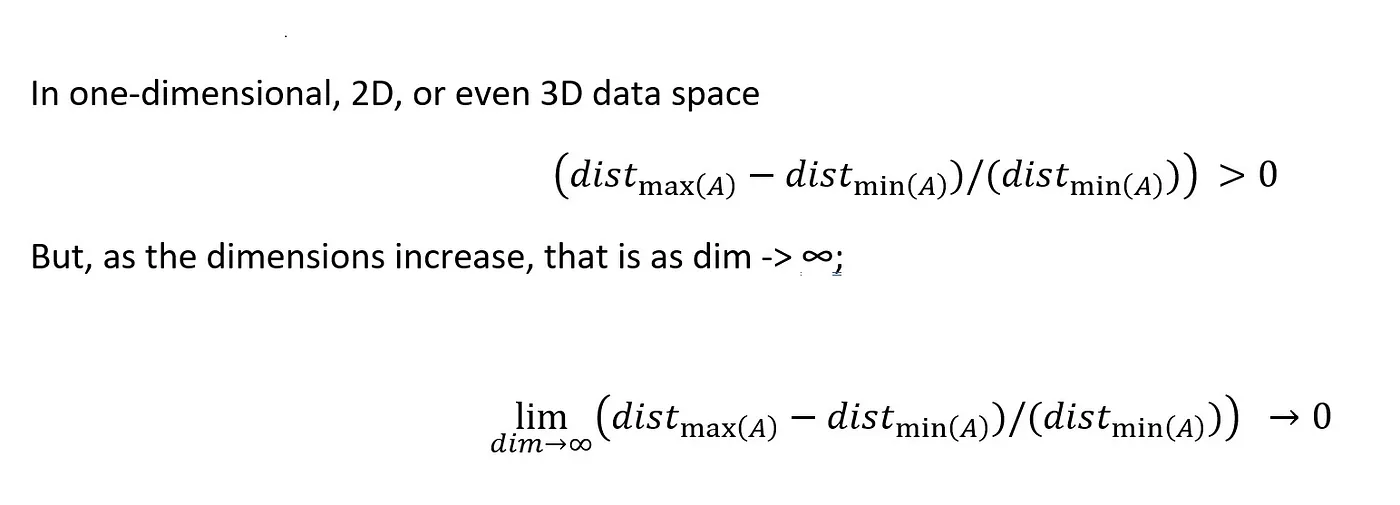

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/curse_of_dim_formula.png', width = 700)

### Response Encoding

* It is a technique to represent the categorical data while solving a machine learning classification problem. As part of this technique, we represent the probability of the data point belonging to a particular class given a category.

In [ ]:
df = pd.DataFrame( [['A', 0],
                    ['B', 1],
                    ['C', 1],
                    ['A', 1],
                    ['A', 1],
                    ['B', 1],
                    ['A', 0],
                    ['A', 0],
                    ['C', 1],
                    ['C', 0]])
df.columns = ['feature', 'prediction']
df

,feature,prediction
0,A,0
1,B,1
2,C,1
3,A,1
4,A,1
5,B,1
6,A,0
7,A,0
8,C,1
9,C,0


In [ ]:
df.groupby(['prediction', 'feature'])['prediction'].count()

prediction  feature
0           A          3
            C          1
1           A          2
            B          2
            C          2
Name: prediction, dtype: int64

In [ ]:
feature_response_encoded = ((df[df['prediction']==1]['feature'].value_counts()/df['feature'].value_counts())
                                                     .fillna(0).reset_index()
                                                     .rename(columns = {'index':'feature','feature':'feature_rE'}))
feature_response_encoded 

,feature,feature_rE
0,A,0.400000
1,B,1.000000
2,C,0.666667


In [ ]:
df_with_rE = feature_response_encoded.merge(df, on = 'feature',how = 'right')
df_with_rE

,feature,feature_rE,prediction
0,A,0.400000,0
1,B,1.000000,1
2,C,0.666667,1
3,A,0.400000,1
4,A,0.400000,1
5,B,1.000000,1
6,A,0.400000,0
7,A,0.400000,0
8,C,0.666667,1
9,C,0.666667,0


### Feature Creation using Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)
* Features to discuss - Country, URL, Device, IP Address